In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Ngay,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
0,20210315,26.80,34.0324,59.2585,28.7373,65.1498,88.3094,29.8199,21.32,34.1877,...,18.9,40.10,21.2593,74.5529,75.6921,94.2222,135.0,97.5982,27.6287,34.45
1,20210316,26.76,33.5576,58.7655,28.5105,68.9822,87.5339,28.9834,21.44,33.8936,...,18.9,39.85,21.1111,74.0884,75.4645,93.6889,134.6,96.4523,27.3512,34.80
2,20210317,26.80,34.2699,58.7655,29.9095,68.8119,89.9573,29.2294,22.00,34.0406,...,19.6,40.30,21.2593,74.0110,75.3129,93.0667,133.5,95.9748,27.5054,34.85
3,20210318,27.16,35.6154,59.8501,30.6279,68.9822,88.9880,30.2136,22.00,34.2612,...,19.7,41.95,21.4815,75.4819,75.6162,94.7556,134.9,97.8847,28.2763,35.00
4,20210319,27.04,35.6154,60.1459,30.5901,67.9602,88.1155,29.5247,21.72,34.6655,...,19.6,42.00,21.4074,72.9272,74.1752,96.3556,130.5,97.1208,27.8754,34.00


In [ ]:
X = df.iloc[:,1:].values
print(X.shape)
print(type(X))
X

(250, 30)
<class 'numpy.ndarray'>


array([[26.8   , 34.0324, 59.2585, ..., 97.5982, 27.6287, 34.45  ],
       [26.76  , 33.5576, 58.7655, ..., 96.4523, 27.3512, 34.8   ],
       [26.8   , 34.2699, 58.7655, ..., 95.9748, 27.5054, 34.85  ],
       ...,
       [32.9   , 40.95  , 57.4   , ..., 77.1   , 36.75  , 32.    ],
       [32.7   , 41.85  , 57.    , ..., 78.    , 36.4   , 31.85  ],
       [32.7   , 41.3   , 55.1   , ..., 77.2   , 36.    , 32.    ]])

In [ ]:
X_R=[]
for i in range(len(X)-1):
  temp = (X[i] - X[i+1])/X[i+1]
  X_R.append(temp)
X_R = np.array(X_R)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def pca_alg(data):

  #tính vector trung bình dữ liệu
  kyvong = np.mean(data,axis = 0)

  #Trừ mỗi điểm dữ liệu cho vector trung bình
  X_hat = (data - kyvong)/np.std(data,axis = 0)

  #Tính ma trận hiệp phương sai
  features = X_hat.T
  cov_matrix = np.cov(features)

  #Tính các cặp trị riêng, vector riêng và sắp xếp theo thứ tự giảm dần tri riêng
  eig_values, eig_vectors = np.linalg.eig(cov_matrix)
  #Sắp xếp giấ trị theo chiều giảm dần
  sort_index = np.argsort(eig_values)[::-1]
  new_eig_values = eig_values[sort_index]
  new_eig_vectors = eig_vectors[:,sort_index]
  
  return new_eig_values, new_eig_vectors

In [ ]:
X_hat = (X_R-np.mean(X_R,axis = 0))/np.std(X_R,axis = 0)

In [ ]:
eig_values, eig_vectors = pca_alg(X_R)
eig_vectors[:,0]

array([0.2269708 , 0.22986336, 0.17383338, 0.24387783, 0.19714815,
       0.15433303, 0.1944745 , 0.22531945, 0.21098143, 0.14822874,
       0.24945192, 0.14701827, 0.17716047, 0.05493943, 0.09939058,
       0.15730195, 0.15806935, 0.1510632 , 0.06940729, 0.22200903,
       0.22225094, 0.25293346, 0.23102776, 0.17055583, 0.20650964,
       0.12129315, 0.01151396, 0.12786235, 0.17728825, 0.17974765])

In [ ]:
projected_1 = X.dot(eig_vectors[:,0])
projected_2 = X.dot(eig_vectors[:,1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res
t = list(projected_1)
project = t.reverse()
th = np.array(t)
projected_1

array([246.61751994, 246.44350762, 247.65390879, 250.89524394,
       248.91712218, 248.35590903, 246.67726202, 242.02609726,
       241.89304894, 241.20871056, 243.45101981, 245.08377767,
       246.42286486, 251.61718442, 254.22897671, 255.85614255,
       256.33013151, 256.92059768, 255.50261405, 255.48671642,
       258.90421488, 257.44474719, 259.30586178, 257.01531216,
       254.98852112, 261.09890408, 263.3849602 , 254.70568173,
       260.45788642, 253.47880502, 254.14803176, 255.60930789,
       257.60463647, 258.1207203 , 261.44046012, 259.73973954,
       258.09679194, 263.24123403, 261.82159643, 265.51186624,
       263.74413139, 265.48743295, 263.61177841, 263.06541421,
       266.07554307, 271.9892254 , 272.99769882, 275.31191423,
       277.72292028, 279.29537733, 276.04184865, 279.58429773,
       280.92951232, 282.07027856, 282.51275544, 286.9323457 ,
       288.76771088, 285.25390085, 276.6393385 , 279.50420333,
       277.48558005, 284.65612613, 287.6067508 , 288.38

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


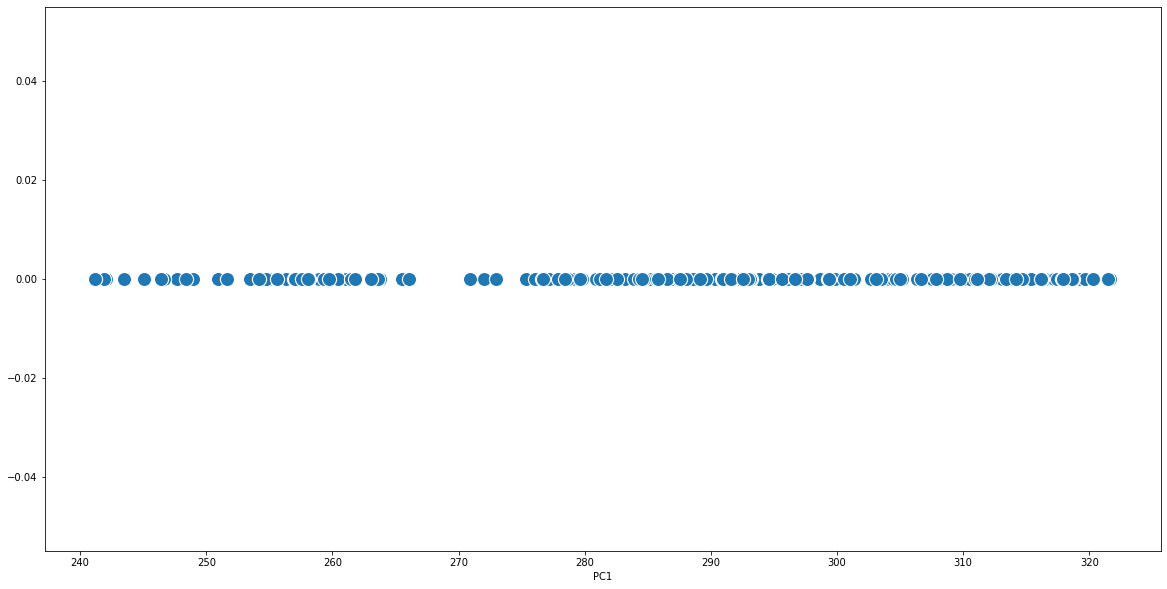

In [ ]:
plt.figure(figsize =(20,10))
sns.scatterplot(res['PC1'],[0]*len(res),s=200)

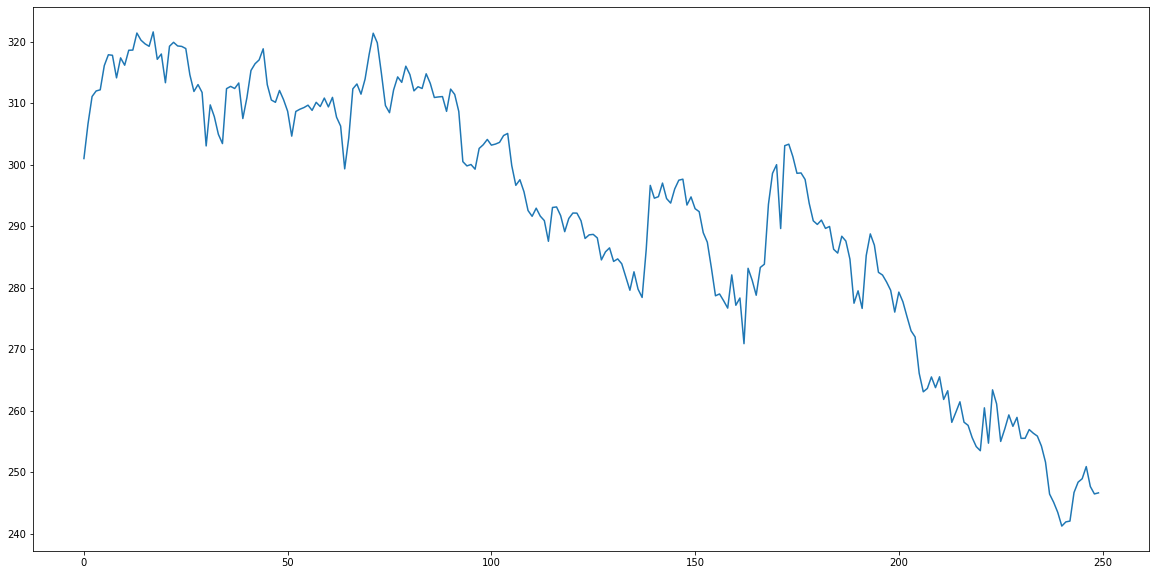

In [ ]:
plt.figure(figsize =(20,10))
plt.plot(th)

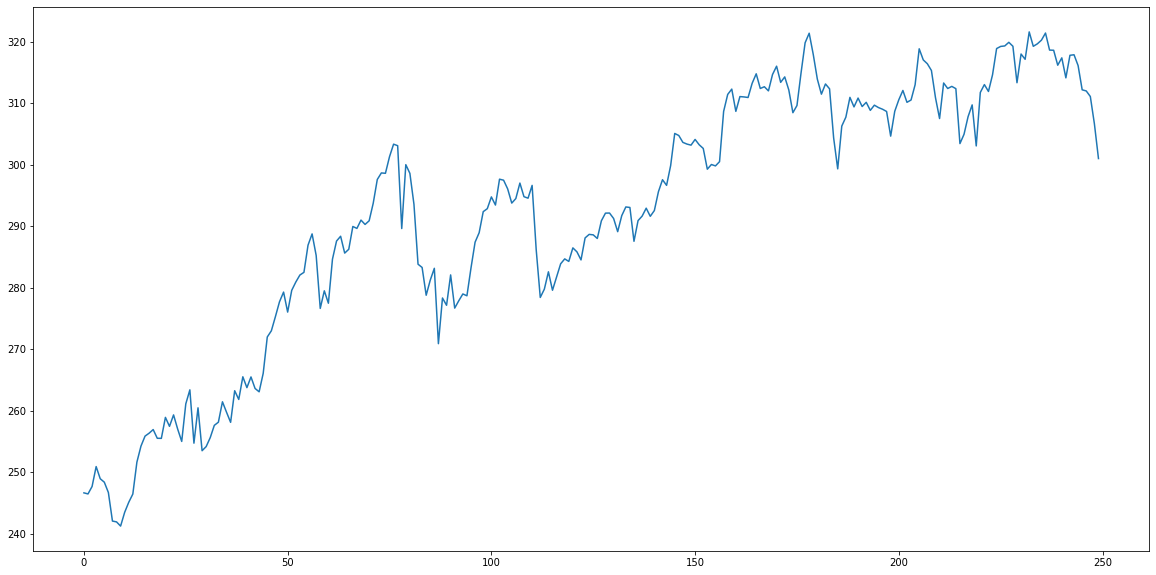

In [ ]:
plt.figure(figsize =(20,10))
plt.plot(projected_1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X)
X_pca_1 = -1*(X_pca)

In [ ]:
res_1 = pd.DataFrame(X_pca, columns=['PC1'])
res_1

,PC1
0,73.702571
1,73.725619
2,72.861314
3,71.261890
4,73.362450
...,...
245,-45.700968
246,-44.853683
247,-39.680061
248,-32.140061


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


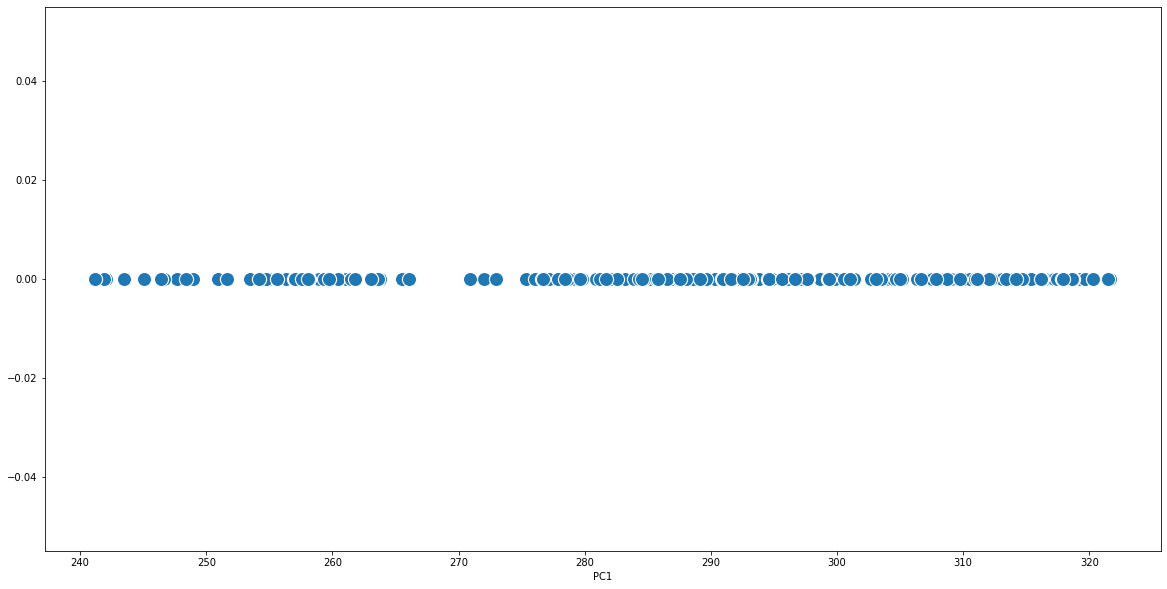

In [ ]:
plt.figure(figsize =(20,10))
sns.scatterplot(res['PC1'],[0]*len(res),s=200)

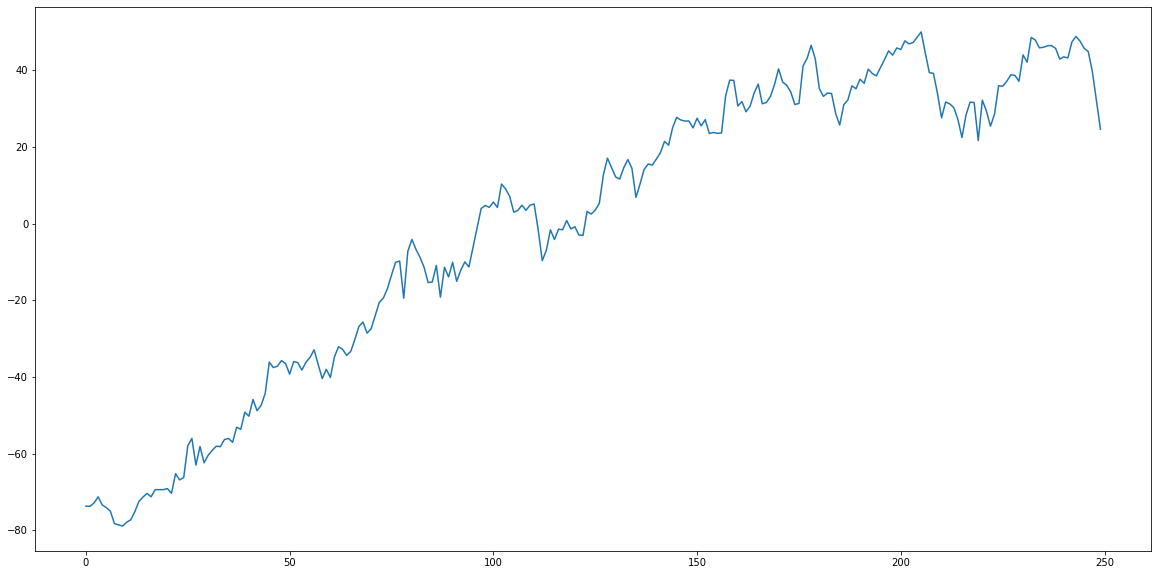

In [ ]:
plt.figure(figsize =(20,10))
plt.plot(X_pca_1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
eigen_vecs[:,0]

array([ 0.22639349,  0.12395214, -0.00399292,  0.06884018,  0.23397219,
        0.1850538 ,  0.19129818,  0.23653005,  0.15914572,  0.24013784,
        0.24351278,  0.23009639,  0.22314878,  0.21640331,  0.23760062,
        0.11161469,  0.17875713,  0.1257352 , -0.10106182,  0.23762118,
        0.22442614,  0.21763074,  0.22930885,  0.13308541,  0.14691103,
       -0.15695051,  0.02906392, -0.20476656,  0.11870613, -0.02787064])

In [ ]:
eig_vectors[:,0]

array([ 0.22639349,  0.12395214, -0.00399292,  0.06884018,  0.23397219,
        0.1850538 ,  0.19129818,  0.23653005,  0.15914572,  0.24013784,
        0.24351278,  0.23009639,  0.22314878,  0.21640331,  0.23760062,
        0.11161469,  0.17875713,  0.1257352 , -0.10106182,  0.23762118,
        0.22442614,  0.21763074,  0.22930885,  0.13308541,  0.14691103,
       -0.15695051,  0.02906392, -0.20476656,  0.11870613, -0.02787064])

In [ ]:
projected_1 = X_hat.dot(eigen_vecs[:,0])
res = pd.DataFrame(projected_1, columns=['PC1'])
res

,PC1
0,-8.527407
1,-8.567236
2,-8.271737
3,-7.987928
4,-8.304937
...,...
245,3.881116
246,4.074602
247,3.805095
248,3.277274


In [ ]:
url='https://drive.google.com/file/d/1x6HADJWvm5wPM3JN-uN3v5OiXMPk6Oed/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Vn30\n Date,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
0,31/12/2021,34.50,37.1000,56.0000,33.9000,93.0000,96.2000,36.9500,30.85,46.4000,...,31.50,50.00,41.0500,78.8000,82.0000,95.1000,128.3,84.9800,35.8000,30.10
1,30/12/2021,33.90,35.4000,55.1000,33.8000,93.6000,97.0000,37.0000,30.60,45.7000,...,30.50,49.30,40.7500,78.4000,81.6000,95.0000,126.0,83.8981,35.4000,30.50
2,29/12/2021,33.80,35.2000,55.2000,34.1500,93.6000,97.0000,36.9000,30.60,45.8000,...,29.50,49.10,41.3500,79.5000,81.7000,95.5000,125.2,83.7997,34.7500,30.55
3,28/12/2021,33.65,35.2000,55.7000,33.9000,94.5000,98.1000,37.8500,30.50,45.8000,...,30.05,49.15,42.0500,80.0000,82.8000,98.4000,125.2,84.0948,34.5500,30.80
4,27/12/2021,33.15,35.3000,56.1000,33.4000,94.5000,95.9000,38.6000,28.75,45.9000,...,28.10,48.85,40.7500,79.8000,82.8000,99.0000,125.0,84.6849,34.3500,31.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1/8/2021,24.16,38.3854,67.3437,29.2667,53.9083,89.8604,28.5405,21.68,31.4306,...,19.40,35.70,21.1111,81.1334,73.1134,99.3778,126.5,106.9570,21.9241,35.50
246,1/7/2021,23.92,38.7020,66.0619,29.3801,53.2270,89.8604,27.8516,21.44,31.4673,...,18.45,34.60,21.0000,82.8366,71.8999,97.8667,124.6,105.4290,21.5233,33.90
247,1/6/2021,23.92,38.6229,65.5689,28.6239,53.1418,87.6309,28.2945,20.52,31.4673,...,18.00,33.20,20.7407,81.2882,71.8999,97.9556,123.7,104.8560,21.2149,33.20
248,1/5/2021,23.48,37.9106,65.0759,26.7711,53.3973,87.2431,29.0326,19.80,31.1365,...,17.70,33.05,20.5556,76.8754,72.5066,97.5111,124.8,105.8110,21.1841,33.30


In [ ]:
X = df.iloc[:,1:].values
print(X.shape)
print(type(X))

(250, 30)
<class 'numpy.ndarray'>


In [ ]:
X_R=[]
for i in range(len(X)-1):
    temp = (X[i] - X[i+1])/X[i+1]
    X_R.append(temp)
X_R = np.array(X_R)
len(X_R)

249

In [ ]:
def pca_alg(data):

  #tính vector trung bình dữ liệu
  
  kyvong = np.mean(data,axis = 0)

  #Trừ mỗi điểm dữ liệu cho vector trung bình
  X_std = (data - kyvong)/np.std(data,axis = 0)

  #Tính ma trận hiệp phương sai
  features = X_std.T
  cov_matrix = np.cov(features)

  #Tính các cặp trị riêng, vector riêng và sắp xếp theo thứ tự giảm dần tri riêng
  values, vectors = np.linalg.eig(cov_matrix)
  eig_values = values[np.argsort(values)[::-1]]
  eig_vectors = vectors[:,np.argsort(values)[::-1]]

  return eig_values, eig_vectors

In [ ]:
eig_values_1, eig_vectors_1 = pca_alg(X_R)

In [ ]:
eig_vectors[:,0]

array([0.2269708 , 0.22986336, 0.17383338, 0.24387783, 0.19714815,
       0.15433303, 0.1944745 , 0.22531945, 0.21098143, 0.14822874,
       0.24945192, 0.14701827, 0.17716047, 0.05493943, 0.09939058,
       0.15730195, 0.15806935, 0.1510632 , 0.06940729, 0.22200903,
       0.22225094, 0.25293346, 0.23102776, 0.17055583, 0.20650964,
       0.12129315, 0.01151396, 0.12786235, 0.17728825, 0.17974765])